In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv("gurgaon_properties_outlier_treated.csv")

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3.0,3.0,3,1.0,South,Moderately Old,NaN,2250.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,30.0,750.000000
1,flat,la vida by tata housing,sector 113,2.78,10335.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.00,2170.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,896.666667
2,house,dlf city plots phase 3,sector 24,1.44,2963.0,4860.0,Plot area 60(50.17 sq.m.),4.0,2.0,2,1.0,NaN,Old Property,NaN,540.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1215.000000
3,house,independent,sector 4,0.65,10317.0,630.0,Plot area 70(6.5 sq.m.),1.0,1.0,1,1.0,South-East,Moderately Old,NaN,70.00,NaN,0.0,0.0,0.0,0.0,1.0,0.0,21.0,630.000000
4,flat,experion windchants,sector 112,3.29,11742.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up...,3.0,3.0,3+,2.0,South,Relatively New,2802.0,2225.56,NaN,1.0,0.0,0.0,0.0,0.0,2.0,192.0,934.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### built_up_area            

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

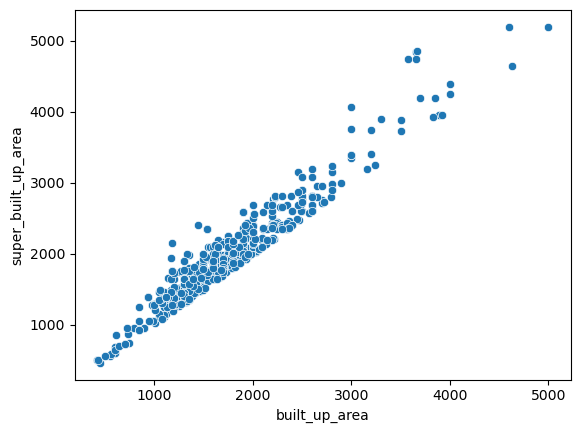

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

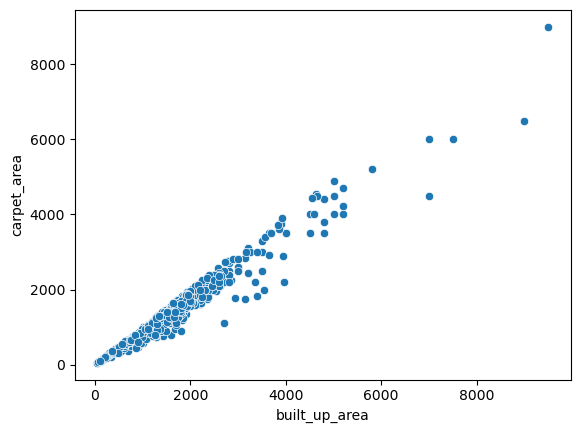

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [12]:
((df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [15]:
all_present_df=df[~((df['super_built_up_area'].isnull())|(df['built_up_area'].isnull())|(df['carpet_area'].isnull()))]

In [16]:
all_present_df.shape

(531, 24)

In [17]:
super_to_built_up_ratio=(all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [18]:
carpet_to_built_up_area=(all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [19]:
print(super_to_built_up_ratio,carpet_to_built_up_area)

1.105263157894737 0.9


In [20]:
# both area present but built up null

sbc_df= df[~(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&~(df['carpet_area'].isnull())]

In [21]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
22,flat,ireo victory valley,sector 67,2.95,12236.0,2411.0,Super Built up area 2411(223.99 sq.m.)Carpet a...,3.0,3.0,3,10.0,North-West,Relatively New,2411.0,NaN,1906.0,1.0,0.0,0.0,0.0,0.0,2.0,228.0,803.666667
29,flat,elan the presidential,sector 106,6.30,15385.0,4095.0,Super Built up area 4095(380.44 sq.m.)Carpet a...,5.0,6.0,3+,10.0,North-East,Under Construction,4095.0,NaN,3500.0,0.0,0.0,0.0,0.0,0.0,2.0,102.0,819.000000
33,flat,pivotal devaan,sector 84,0.35,7277.0,481.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2.0,2.0,1,10.0,West,Relatively New,583.0,NaN,481.0,0.0,0.0,0.0,1.0,0.0,0.0,123.0,240.500000
35,flat,indiabulls centrum park,sector 103,2.14,7443.0,2875.0,Super Built up area 2875(267.1 sq.m.)Carpet ar...,4.0,6.0,3+,7.0,East,Relatively New,2875.0,NaN,2550.0,1.0,0.0,0.0,0.0,0.0,0.0,190.0,718.750000
40,flat,shree vardhman victoria,sector 70,1.63,8359.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,3.0,3,5.0,East,New Property,1950.0,NaN,1161.0,1.0,0.0,0.0,0.0,1.0,0.0,56.0,650.000000


In [22]:
sbc_df.shape

(421, 24)

In [23]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] /1.105263157894737)+ (sbc_df['carpet_area'] /0.9))/2),inplace=True) 

C:\Users\sk531\AppData\Local\Temp\ipykernel_30536\1777072953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] /1.105263157894737)+ (sbc_df['carpet_area'] /0.9))/2),inplace=True)


In [24]:
df.update(sbc_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
servant room              0
study room                0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [26]:
# super_built not null and (c and builtup null)


sb_df=df[~(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())& (df['carpet_area'].isnull())]

In [28]:
sb_df.shape

(875, 24)